In [ ]:
#TASK: Please create a model based on the IRIS dataset, ideally with PyTorch and take the following steps

In [93]:
#Importing the libraries and modules   

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report


In [122]:
#1. Data Prepration

#1.1 Loading Dataset

iris = load_iris()
X_inputs, labels = iris.data, iris.target

In [12]:
#print(y)

In [123]:
#1.2 split the data
X_train, X_test, y_train, y_test = train_test_split(X_inputs, labels, test_size=0.2, random_state=42)

In [96]:
#1.3 creating a dataset

## data Preparation
## Creating a class to be used with the Pytorch's dataloader

class IrisDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.LongTensor(labels)
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create the trainig and test dataset and dataloader
train_data = IrisDataset(X_train, y_train)
test_data = IrisDataset(X_test, y_test)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [124]:
#2. Model Selection and Traing

# creating a class for training model
class IrisNN(nn.Module):
    def __init__(self):
        super(IrisNN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 4)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        self.relu = nn.ReLU()
        return x

# Selecting the Model -- IrisNet and training with neural network - cross entropy loss and Adam optimizer
model = IrisNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [144]:
#Training the model for some epochs under the loop. - you can change the number of epochs as you wish

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

In [149]:
#Model Evaluation

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
loss = criterion(output, labels)

loss: 0.06


In [150]:
print(f"The accuracy: {accuracy:.4f}")
print(f"loss: {loss:.2f}")

The accuracy: 0.9667
loss: 0.06


In [147]:
print(classification_report(all_labels, all_preds, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



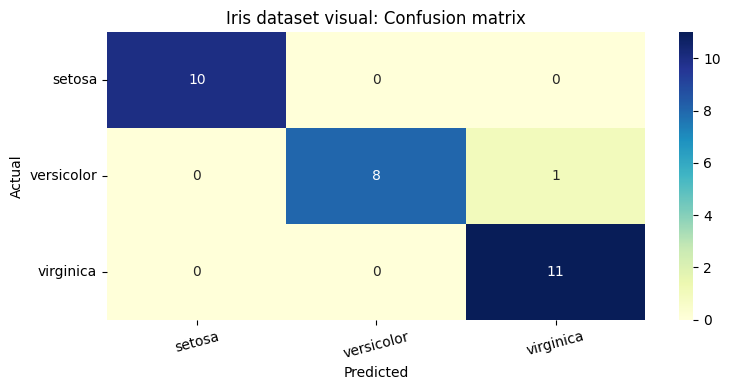

In [148]:
# Visualize the dataset with confusion matrix: to show the relationship between the predicted and actual classes.

conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Iris dataset visual: Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(iris.target_names)) + 0.5
plt.xticks(tick_marks, iris.target_names, rotation=15)
plt.yticks(tick_marks, iris.target_names, rotation=0)
plt.tight_layout()
plt.show()